In [41]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import csv
import os
import json
import scipy.stats as st
from numpy import array
from scipy.stats import sem
import datetime as dt
from datetime import datetime
import math
import matplotlib.animation as animation

In [42]:
#url = " https://api.covidtracking.com/v1/states/daily.json"
#covid= requests.get(url)

df=pd.read_json('https://api.covidtracking.com/v1/states/daily.json')

df.to_csv('covidtracking.csv', index=None)

df.head()

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
#df['date'].dtype

#df[['year', 'month', 'day']] = 
#split = df['date'].str.split('-',n=2, expand=True)
#split.head()

In [43]:
import seaborn as sb

#[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
sb.lineplot(x='Month', y='Ventilator_Currently', data=df)
sb.lineplot(x='Month', y='ICU_Currently', data=df)
plt.ylabel("Ventilator and ICU")
plt.xticks(rotation=25)

ValueError: Could not interpret value `Month` for parameter `x`

In [ ]:
#create percent positive by dividing positive by total positive results
#df.assign(pos_percent = df.positive/df.totalTestResults)

#create % hospitalized by dividing hospitalized by total positive
#df.keys(per_hospit = df.hospitalizedCurrently/df.positive)

#Splitting the Date by Year, Month and Day. Also, Renaming the columns
df[['year','month','day']] = df.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df




In [ ]:
#Drop the data from before Mar, 2020
df.drop(df.index[20588:] ,axis = 0, inplace=True)
df

In [ ]:
#Rename columns
df.keys()
date', 'state', 'positive', '4', '5', '6',
       '7', '8', 'hospitalizedCurrently',
       '10', 'inIcuCurrently', '12',
       'onVentilatorCurrently', '14', '15',
       '16', '17', '18', 'death', 'hospitalized',
       '21', '22', '23',
       '24', '25', '26',
       '27', '28', '29',
       '30', '31', '32',
       '33', '34',
       '35', '36',
       '37', '38',
       '39', '40', '41', 'positiveIncrease',
       '43', '44', '45', '46',
       '47', 'deathIncrease', 'hospitalizedIncrease', '50',
       '51', '52', '53',
       '54', '55', '56', 'year', 'month', 'day'


In [ ]:
df2 = df.drop(df.columns[[3,4,5,6,7,9,11,13,14,15,16,17,20,21,22,
                          23,24,25,26,27,28,29,30,31,32,33,34,35,36,
                          37,38,39,40,42,43,44,45,46,49,50,51,52,53,
                         54,55]], axis=1)


df3 =df2.rename(columns={
    "date":"Date", 
    "state":"State", 
    "positive": "Positive(all)",
    "deathIncrease":"Death_Increase",
    "hospitalizedCurrently":"Hospitalized_Currently",
    "hospitalizedIncrease":"Hospitalized_Increase",
    "positiveIncrease":"Positive_Increase",
    "onVentilatorCurrently":"Ventilator_Currently", 
    "totalTestResultsIncrease":"TotalTestResults",
    "inIcuCurrently":"ICU_Currently",
    "death":"Deaths(all)",
    "hospitalized":"Hospitalized(all)",
    "year":"Year",
    "month":"Month",
    "day":"Day",
}) 
    
df3

In [44]:
import seaborn as sb

#[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
sb.lineplot(x='Month', y='Ventilator_Currently', data=df)
sb.lineplot(x='Month', y='ICU_Currently', data=df)
plt.ylabel("Ventilator and ICU")
plt.xticks(rotation=25)

ValueError: Could not interpret value `Month` for parameter `x`

In [45]:
#Grouping the covid information by Year, Month and State. This helps us to summarize the covid information by Year+Month for each state.
grouped_df = df3.groupby(['Year','Month','State']).agg({"Positive(all)":'sum',
                                                                  "Hospitalized_Currently":'sum',
                                                                  "Hospitalized_Increase":'sum',
                                                                  "Hospitalized(all)":'sum',
                                                                  "Positive_Increase":'sum',
                                                                  "Ventilator_Currently":'sum',
                                                                  "Deaths(all)":'sum',
                                                                  "ICU_Currently":'sum',
                                                                  "Death_Increase":'sum',
                                                                 })


temp_df = grouped_df.reset_index()
temp_df
#df[df.State != 'AS',]


,Year,Month,State,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
0,2020,03,AK,789.0,0.0,12,72.0,128,0.0,13.0,0.0,3
1,2020,03,AL,5640.0,1003.0,0,0.0,981,0.0,30.0,0.0,13
2,2020,03,AR,3759.0,376.0,0,0.0,523,111.0,34.0,0.0,8
3,2020,03,AS,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0
4,2020,03,AZ,7133.0,0.0,530,3927.0,1287,0.0,113.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
723,2021,03,VT,109695.0,187.0,0,0.0,885,0.0,1448.0,32.0,4
724,2021,03,WA,2395648.0,3174.0,280,136245.0,4759,374.0,35039.0,816.0,85
725,2021,03,WI,4338630.0,1860.0,330,184265.0,4287,0.0,49517.0,500.0,92
726,2021,03,WV,929024.0,1400.0,0,0.0,1590,186.0,16185.0,388.0,25


In [11]:
#histograms: 728 rows
d1 = temp_df['Positive(all)'].describe()
d1

count    7.280000e+02
mean     4.671554e+06
std      9.067536e+06
min      0.000000e+00
25%      1.792732e+05
50%      1.400664e+06
75%      5.027885e+06
max      9.486491e+07
Name: Positive(all), dtype: float64

In [46]:
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','IL','NJ','NY','OH','PA','TX']
cases = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = temp_df.loc[temp_df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    icu_cases = spec_year['ICU_Currently']
    cases.append(icu_cases)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = icu_cases.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (icu_cases.loc[(spec_year['ICU_Currently'] >= UCL_out) | 
                                        (spec_year['ICU_Currently'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')
    
   
    

The Interquartile Range for CA is 18876.75
Lower bound for CA is 4539.125
Upper bound for CA is 80046.125
CA potential outliers: 2
The Interquartile Range for IL is 19671.25
Lower bound for IL is -18844.125
Upper bound for IL is 59840.875
IL potential outliers: 0
The Interquartile Range for NJ is 15525.0
Lower bound for NJ is -19854.25
Upper bound for NJ is 42245.75
NJ potential outliers: 1
The Interquartile Range for NY is 22291.0
Lower bound for NY is -28005.25
Upper bound for NY is 61158.75
NY potential outliers: 2
The Interquartile Range for OH is 3899.5
Lower bound for OH is 777.75
Upper bound for OH is 16375.75
OH potential outliers: 4
The Interquartile Range for PA is 0.0
Lower bound for PA is 0.0
Upper bound for PA is 0.0
PA potential outliers: 10
The Interquartile Range for TX is 44309.75
Lower bound for TX is -42350.125
Upper bound for TX is 134888.875
TX potential outliers: 0


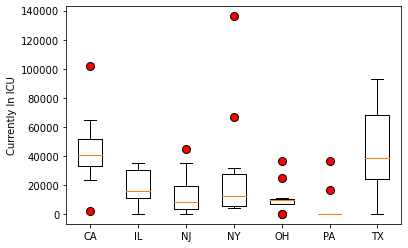

In [13]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(cases, flierprops=flierprops)
plt.ylabel('Currently In ICU')
plt.xticks([1, 2, 3, 4,5,6,7], ['CA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [14]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
deaths = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = temp_df.loc[temp_df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    died = spec_year['Deaths(all)']
    deaths.append(died)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = died.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (died.loc[(spec_year['Deaths(all)'] >= UCL_out) | 
                                        (spec_year['Deaths(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 387623.5
Lower bound for CA is -469645.0
Upper bound for CA is 1080849.0
CA potential outliers: 0
The Interquartile Range for FL is 397799.75
Lower bound for FL is -527259.625
Upper bound for FL is 1063939.375
FL potential outliers: 0
The Interquartile Range for GA is 167957.75
Lower bound for GA is -196394.375
Upper bound for GA is 475436.625
GA potential outliers: 0
The Interquartile Range for IL is 141933.5
Lower bound for IL is -70934.25
Upper bound for IL is 496799.75
IL potential outliers: 0
The Interquartile Range for NJ is 119698.5
Lower bound for NJ is 197594.5
Upper bound for NJ is 676388.5
NJ potential outliers: 2
The Interquartile Range for NY is 88944.0
Lower bound for NY is 562614.5
Upper bound for NY is 918390.5
NY potential outliers: 2
The Interquartile Range for OH is 95154.75
Lower bound for OH is -86170.625
Upper bound for OH is 294448.375
OH potential outliers: 0
The Interquartile Range for PA is 111665.0
Lower bound for PA is -2303

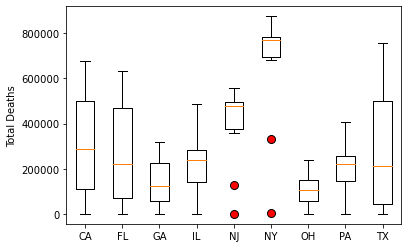

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(deaths, flierprops=flierprops)
plt.ylabel('Total Deaths')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [16]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
positive = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = temp_df.loc[temp_df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    Pos_case = spec_year['Positive(all)']
    positive.append(Pos_case)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = Pos_case.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (Pos_case.loc[(spec_year['Positive(all)'] >= UCL_out) | 
                                        (spec_year['Positive(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 22799731.25
Lower bound for CA is -31200573.625
Upper bound for CA is 59998351.375
CA potential outliers: 0
The Interquartile Range for FL is 20555379.0
Lower bound for FL is -29179131.5
Upper bound for FL is 53042384.5
FL potential outliers: 0
The Interquartile Range for GA is 8777748.75
Lower bound for GA is -11846074.625
Upper bound for GA is 23264920.375
GA potential outliers: 0
The Interquartile Range for IL is 6911310.75
Lower bound for IL is -7250479.125
Upper bound for IL is 20394763.875
IL potential outliers: 1
The Interquartile Range for NJ is 2179396.0
Lower bound for NJ is 1344780.5
Upper bound for NJ is 10062364.5
NJ potential outliers: 2
The Interquartile Range for NY is 3655719.25
Lower bound for NY is 5414762.375
Upper bound for NY is 20037639.375
NY potential outliers: 2
The Interquartile Range for OH is 4285380.75
Lower bound for OH is -5472474.875
Upper bound for OH is 11669048.125
OH potential outliers: 1
The Interquartile Range for

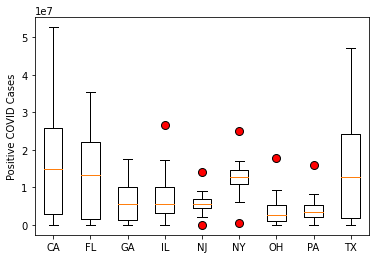

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(positive, flierprops=flierprops)
plt.ylabel('Positive COVID Cases')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [18]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
hospital = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = temp_df.loc[temp_df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    hos_num = spec_year['Hospitalized(all)']
    hospital.append(hos_num)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = hos_num.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (hos_num.loc[(spec_year['Hospitalized(all)'] >= UCL_out) | 
                                        (spec_year['Hospitalized(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 0.0
Lower bound for CA is 0.0
Upper bound for CA is 0.0
CA potential outliers: 10
The Interquartile Range for FL is 1128798.25
Lower bound for FL is -1406473.375
Upper bound for FL is 3108719.625
FL potential outliers: 0
The Interquartile Range for GA is 676301.75
Lower bound for GA is -788680.625
Upper bound for GA is 1916526.375
GA potential outliers: 0
The Interquartile Range for IL is 0.0
Lower bound for IL is 0.0
Upper bound for IL is 0.0
IL potential outliers: 10
The Interquartile Range for NJ is 603457.25
Lower bound for NJ is -688619.375
Upper bound for NJ is 1725209.625
NJ potential outliers: 0
The Interquartile Range for NY is 0.0
Lower bound for NY is 0.0
Upper bound for NY is 0.0
NY potential outliers: 10
The Interquartile Range for OH is 340707.5
Lower bound for OH is -346026.5
Upper bound for OH is 1016803.5
OH potential outliers: 1
The Interquartile Range for PA is 0.0
Lower bound for PA is 0.0
Upper bound for PA is 0.0
PA potential outl

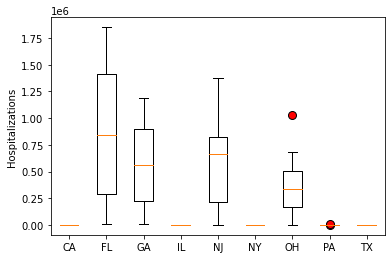

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(hospital, flierprops=flierprops)
plt.ylabel('Hospitalizations')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [20]:
state_group = grouped_df.groupby(['State']).agg({"Positive(all)":'sum',
                                                                  "Hospitalized_Currently":'sum',
                                                                  "Hospitalized_Increase":'sum',
                                                                  "Hospitalized(all)":'sum',
                                                                  "Positive_Increase":'sum',
                                                                  "Ventilator_Currently":'sum',
                                                                  "Deaths(all)":'sum',
                                                                  "ICU_Currently":'sum',
                                                                  "Death_Increase":'sum',
                                                                 })
state_group

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
State,,,,,,,,,
AK,6158147.0,17804.0,1293,157626.0,56886,2101.0,31486.0,0.0,305
AL,62062326.0,404951.0,45976,6133645.0,499819,0.0,1038264.0,0.0,10148
AR,37622536.0,188044.0,14926,2017857.0,324818,34700.0,601561.0,52440.0,5319
AS,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0
AZ,95464371.0,640831.0,57903,7425807.0,826452,112235.0,1918434.0,172806.0,16328
CA,379100459.0,2653612.0,0,0.0,3501341,0.0,5733089.0,668693.0,54124
CO,49413695.0,231196.0,23904,3478740.0,436600,0.0,908462.0,0.0,5989
CT,33618419.0,214270.0,0,1908439.0,285330,0.0,1584666.0,0.0,7704
DC,6050063.0,58996.0,0,0.0,41419,9650.0,207067.0,15628.0,1030


In [21]:
import seaborn

variables = state_group[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
                    'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
                    'Deaths(all)', 'ICU_Currently','Death_Increase']]
#table with correlations
variables.corr()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.000000,0.981362,0.276263,0.293285,0.995430,0.308478,0.857181,0.864899,0.974164
Hospitalized_Currently,0.981362,1.000000,0.193764,0.208581,0.982161,0.361417,0.878225,0.916055,0.980022
Hospitalized_Increase,0.276263,0.193764,1.000000,0.987198,0.251226,0.209477,0.258071,-0.010785,0.270491
Hospitalized(all),0.293285,0.208581,0.987198,1.000000,0.263702,0.187084,0.295318,-0.021674,0.293715
Positive_Increase,0.995430,0.982161,0.251226,0.263702,1.000000,0.280458,0.827902,0.882345,0.967302
Ventilator_Currently,0.308478,0.361417,0.209477,0.187084,0.280458,1.000000,0.590391,0.351520,0.449682
Deaths(all),0.857181,0.878225,0.258071,0.295318,0.827902,0.590391,1.000000,0.760725,0.930847
ICU_Currently,0.864899,0.916055,-0.010785,-0.021674,0.882345,0.351520,0.760725,1.000000,0.867230
Death_Increase,0.974164,0.980022,0.270491,0.293715,0.967302,0.449682,0.930847,0.867230,1.000000


In [22]:
#seaborn correlation matrix heatmap
variables.corr().style.background_gradient(cmap='coolwarm')

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.000000,0.981362,0.276263,0.293285,0.995430,0.308478,0.857181,0.864899,0.974164
Hospitalized_Currently,0.981362,1.000000,0.193764,0.208581,0.982161,0.361417,0.878225,0.916055,0.980022
Hospitalized_Increase,0.276263,0.193764,1.000000,0.987198,0.251226,0.209477,0.258071,-0.010785,0.270491
Hospitalized(all),0.293285,0.208581,0.987198,1.000000,0.263702,0.187084,0.295318,-0.021674,0.293715
Positive_Increase,0.995430,0.982161,0.251226,0.263702,1.000000,0.280458,0.827902,0.882345,0.967302
Ventilator_Currently,0.308478,0.361417,0.209477,0.187084,0.280458,1.000000,0.590391,0.351520,0.449682
Deaths(all),0.857181,0.878225,0.258071,0.295318,0.827902,0.590391,1.000000,0.760725,0.930847
ICU_Currently,0.864899,0.916055,-0.010785,-0.021674,0.882345,0.351520,0.760725,1.000000,0.867230
Death_Increase,0.974164,0.980022,0.270491,0.293715,0.967302,0.449682,0.930847,0.867230,1.000000


<AxesSubplot:>

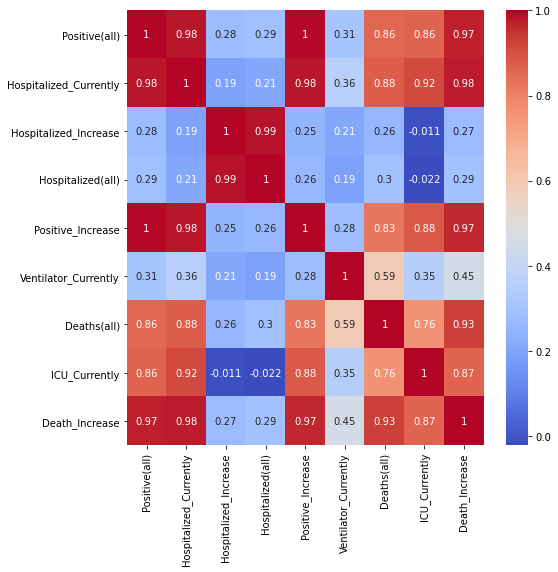

In [23]:
plt.figure(figsize=(8,8))
seaborn.heatmap(variables.corr(), annot=True, cmap="coolwarm")

In [24]:
temp_df

long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
                    'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
                    'Deaths(all)', 'ICU_Currently','Death_Increase']]
#table with correlations
long_data.corr()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.000000,0.773689,0.245971,0.406844,0.797717,0.263670,0.873972,0.661290,0.753212
Hospitalized_Currently,0.773689,1.000000,0.261328,0.244149,0.910438,0.394563,0.693528,0.913909,0.911942
Hospitalized_Increase,0.245971,0.261328,1.000000,0.712426,0.290601,0.253117,0.232054,0.097023,0.265415
Hospitalized(all),0.406844,0.244149,0.712426,1.000000,0.292920,0.169958,0.397595,0.043165,0.265976
Positive_Increase,0.797717,0.910438,0.290601,0.292920,1.000000,0.306955,0.670415,0.781423,0.757256
Ventilator_Currently,0.263670,0.394563,0.253117,0.169958,0.306955,1.000000,0.405512,0.390798,0.433572
Deaths(all),0.873972,0.693528,0.232054,0.397595,0.670415,0.405512,1.000000,0.592533,0.676509
ICU_Currently,0.661290,0.913909,0.097023,0.043165,0.781423,0.390798,0.592533,1.000000,0.849042
Death_Increase,0.753212,0.911942,0.265415,0.265976,0.757256,0.433572,0.676509,0.849042,1.000000


<AxesSubplot:>

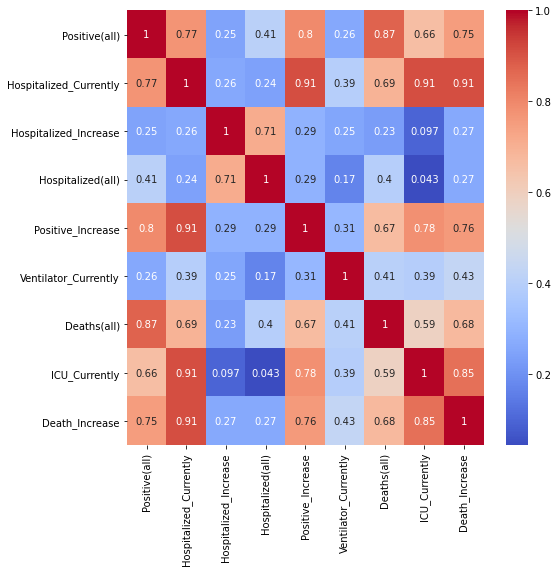

In [25]:
plt.figure(figsize=(8,8))
seaborn.heatmap(long_data.corr(), annot=True, cmap="coolwarm")

In [26]:
#drop all missing data
covid_plot = long_data.dropna()
#compute descriptive statistics
covid_plot.describe()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
count,7.280000e+02,728.000000,728.000000,7.280000e+02,7.280000e+02,728.000000,7.280000e+02,728.000000,728.000000
mean,4.671554e+06,28356.337912,1066.424451,1.575433e+05,3.950052e+04,1900.280220,1.008057e+05,5748.010989,707.618132
std,9.067536e+06,55933.469205,2197.508653,3.046301e+05,8.257636e+04,4365.328284,1.748146e+05,13860.540087,1420.069048
min,0.000000e+00,0.000000,-11560.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.792732e+05,1450.750000,0.000000,0.000000e+00,2.709250e+03,0.000000,3.928500e+03,0.000000,44.000000
50%,1.400664e+06,9404.000000,162.000000,1.566350e+04,1.249650e+04,0.000000,3.092850e+04,736.000000,242.000000
75%,5.027885e+06,30229.500000,1224.750000,1.845065e+05,3.834600e+04,1811.000000,1.198930e+05,5876.000000,731.250000
max,9.486491e+07,637255.000000,17197.000000,2.165477e+06,1.032411e+06,37974.000000,1.306292e+06,144694.000000,16771.000000


<AxesSubplot:>

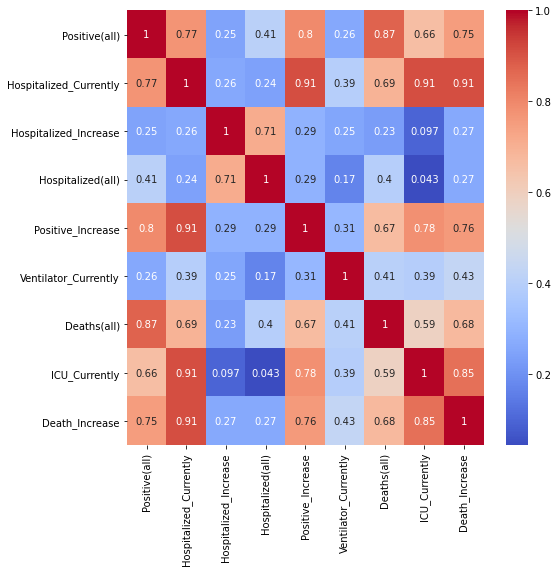

In [27]:
#seaborn plot with complete case data set
plt.figure(figsize=(8,8))
seaborn.heatmap(covid_plot.corr(), annot=True, cmap="coolwarm")

#given that the data is skweded, we need to use a spearman correlation

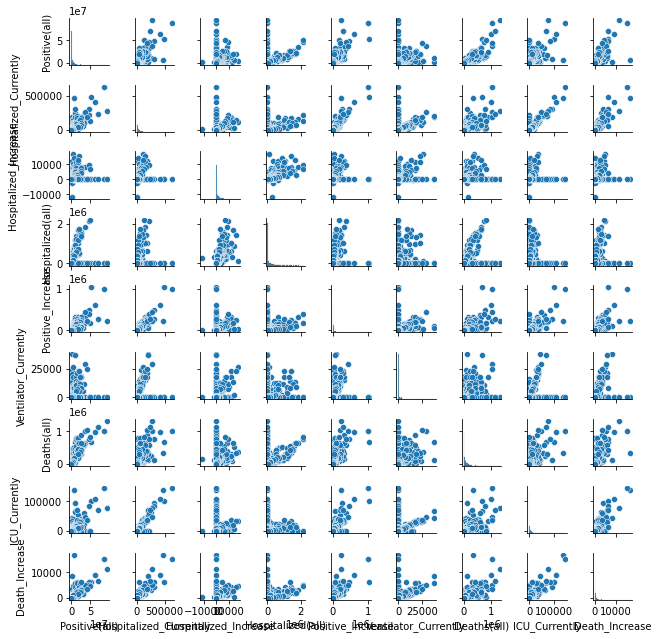

In [28]:
#compare pairplot and heatmap positive and negative correlations
seaborn.pairplot(covid_plot, height=1)

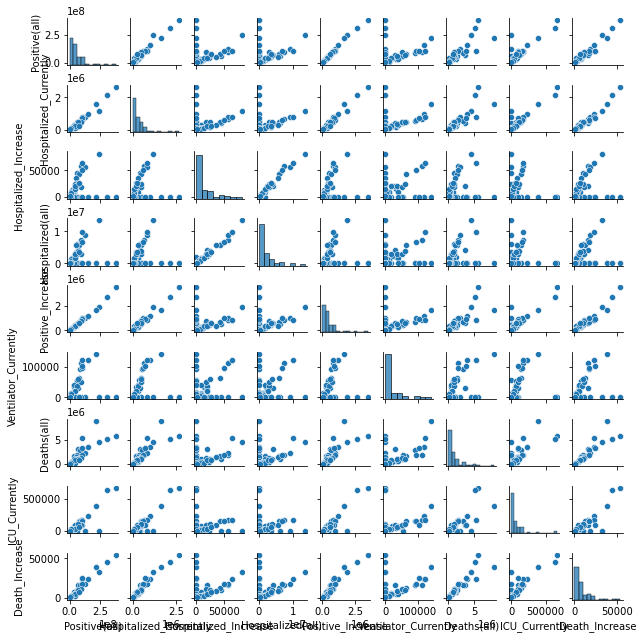

In [29]:
#just looking at total numbers by state
seaborn.pairplot(state_group, height=1)

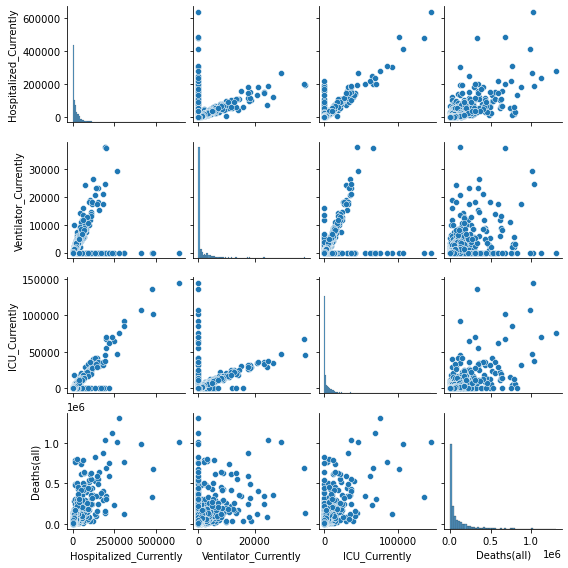

In [30]:
long_data2 = temp_df[['Hospitalized_Currently', 'Ventilator_Currently',
                      'ICU_Currently','Deaths(all)']]
seaborn.pairplot(long_data2, height=2)

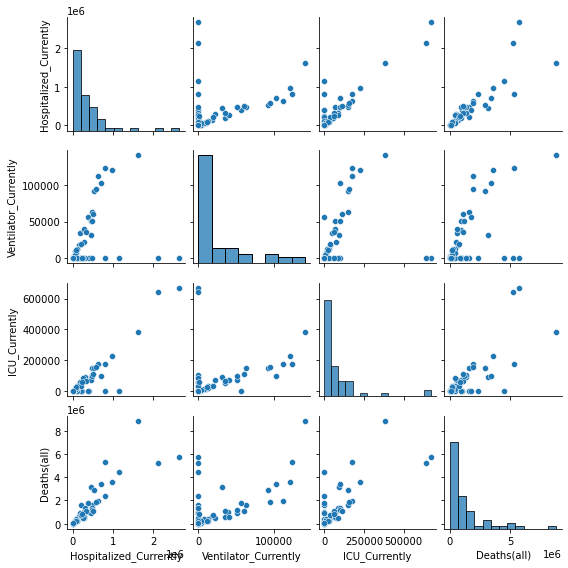

In [31]:
short_data = state_group[['Hospitalized_Currently', 'Ventilator_Currently',
                      'ICU_Currently','Deaths(all)']]
seaborn.pairplot(short_data, height=2)

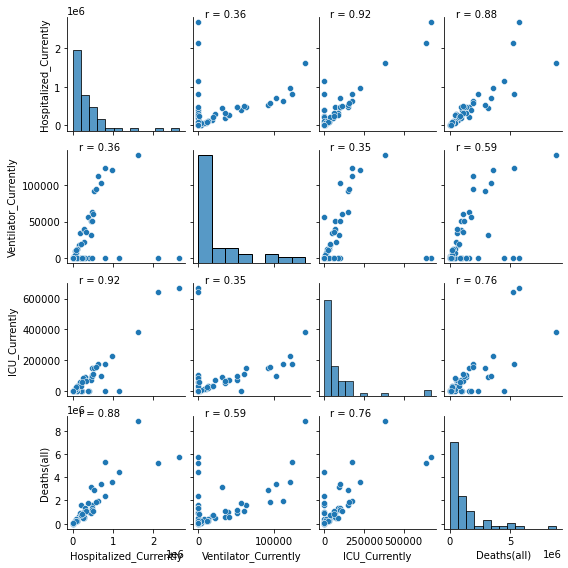

In [32]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)
    
pair_plot = seaborn.pairplot(short_data, height=2)
pair_plot.map_lower(corrfunc)
pair_plot.map_upper(corrfunc)

array([[<AxesSubplot:title={'center':'Hospitalized_Currently'}>,
        <AxesSubplot:title={'center':'Ventilator_Currently'}>],
       [<AxesSubplot:title={'center':'ICU_Currently'}>,
        <AxesSubplot:title={'center':'Deaths(all)'}>]], dtype=object)

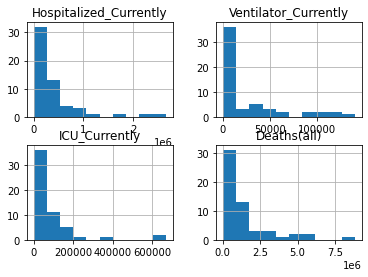

In [33]:
#distribution
short_data.hist()

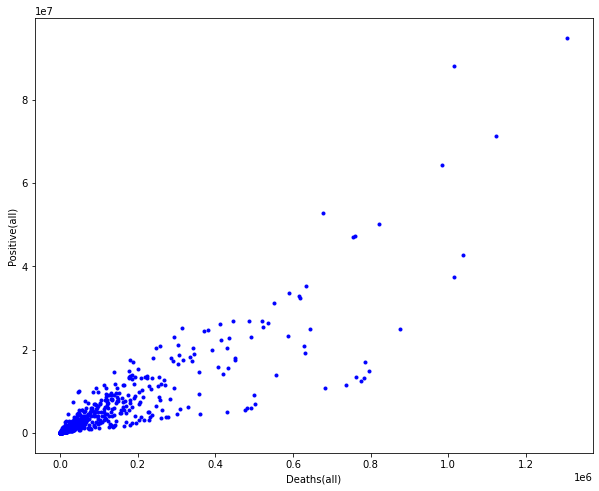

In [34]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]

x= long_data['Deaths(all)']
y= long_data['Positive(all)']

plt.figure(figsize=(10,8))
plt.plot(x,y, 'b.')
plt.xlabel('Deaths(all)')
plt.ylabel('Positive(all)')
plt.show()

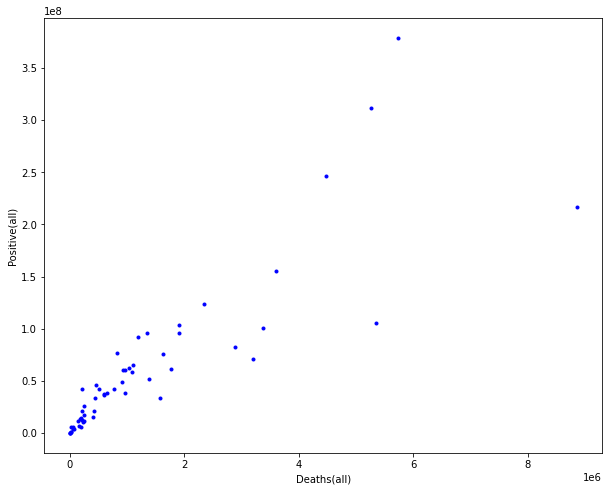

In [35]:
x= state_group['Deaths(all)']
y= state_group['Positive(all)']

plt.figure(figsize=(10,8))
plt.plot(x,y, 'b.')
plt.xlabel('Deaths(all)')
plt.ylabel('Positive(all)')
plt.show()

In [36]:

#define the linear regression
def linear_regression(xvalues, yvalues, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
    values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,values,"r-")
    plt.annotate(line_eq, coordinates, fontsize=14, color='red')
    plt.xlabel('Deaths(all)')
    print(f"The r value is: {rvalue}")
    plt.ylabel(title)
    plt.show()

The r value is: 0.7607250191436589


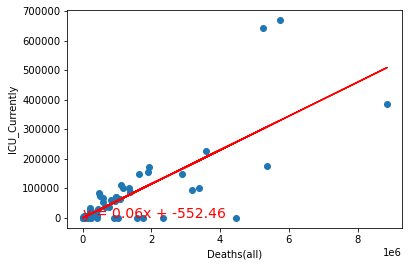

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
State,,,,,,,,,
AK,6158147.0,17804.0,1293,157626.0,56886,2101.0,31486.0,0.0,305
AL,62062326.0,404951.0,45976,6133645.0,499819,0.0,1038264.0,0.0,10148
AR,37622536.0,188044.0,14926,2017857.0,324818,34700.0,601561.0,52440.0,5319
AS,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0
AZ,95464371.0,640831.0,57903,7425807.0,826452,112235.0,1918434.0,172806.0,16328
CA,379100459.0,2653612.0,0,0.0,3501341,0.0,5733089.0,668693.0,54124
CO,49413695.0,231196.0,23904,3478740.0,436600,0.0,908462.0,0.0,5989
CT,33618419.0,214270.0,0,1908439.0,285330,0.0,1584666.0,0.0,7704
DC,6050063.0,58996.0,0,0.0,41419,9650.0,207067.0,15628.0,1030


<Figure size 432x288 with 0 Axes>

In [51]:
#with all data collapsed into state
xvalues = state_group['Deaths(all)']
yvalues = state_group['ICU_Currently']
linear_regression(xvalues, yvalues, 'ICU_Currently', (8,35)) 

plt.savefig('Deaths and ICU.png')
state_group


The r value is: 0.5925327462748743


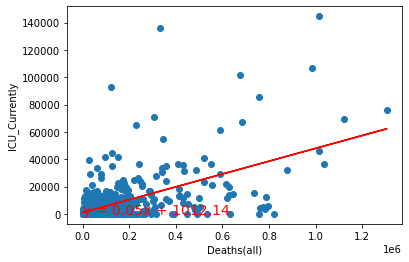

NameError: name 'rvalue' is not defined

<Figure size 432x288 with 0 Axes>

In [47]:
#with all data grouped by state, month and year
xvalues = long_data['Deaths(all)']
yvalues = long_data['ICU_Currently']
linear_regression(xvalues, yvalues, 'ICU_Currently', (8,35)) 

plt.savefig('Deaths and ICU_long.png')
print(f"The r-value is: {rvalue}")

The r value is: 0.6935280701780575


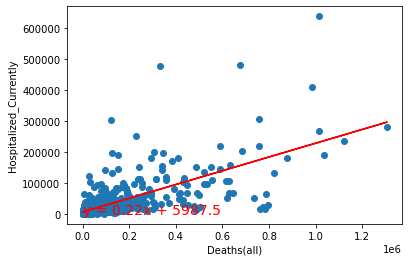

NameError: name 'rvalue' is not defined

<Figure size 432x288 with 0 Axes>

In [50]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Hospitalized_Currently']
linear_regression(xvalues, yvalues, 'Hospitalized_Currently', (8,35)) 

plt.savefig('Deaths and hos_current.png')
print(f"The r-value is: {rvalue}")

The r value is: 0.40551183018935016


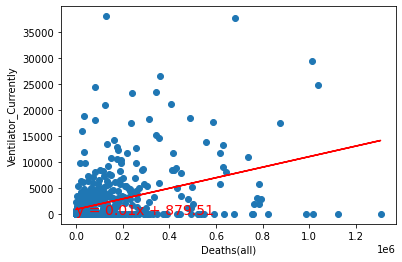

NameError: name 'rvalue' is not defined

<Figure size 432x288 with 0 Axes>

In [48]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Ventilator_Currently']
linear_regression(xvalues, yvalues, 'Ventilator_Currently', (8,35)) 

plt.savefig('Deaths and vent_current.png')
print(f"The r-value is: {rvalue}")

The r value is: 0.8739720320714295


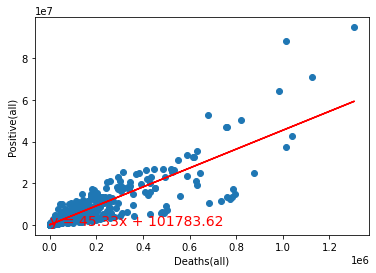

NameError: name 'rvalue' is not defined

<Figure size 432x288 with 0 Axes>

In [49]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Positive(all)']
linear_regression(xvalues, yvalues, 'Positive(all)', (8,35)) 

plt.savefig('Deaths and positive.png')
print(f"The r-value is: {rvalue}")